<center><b><u>02 Deep learning Segmentation (CellPose)</u></b></center>


The CellPose method (publish by Stinger et. al. ) uses a neural network (NN) to detect and segment cells from an input image. The NN is trained on a dataset of labeled images, with the labels indicating which pixels belong to each cell. After training, the network is able to accurately identify cells in a new image. CellPose also allows for the detection of multiple cells in an image, allowing for the analysis of cell colonies. 

In conclusion, the CellPose method provides an efficient and accurate way to segment cells from microscopy images. This method can be used to analyze individual cells or cell colonies, allowing for the accurate measurement of cell features.

- Stringer, C., Wang, T., Michaelos, M., & Pachitariu, M. (2021). Cellpose: a generalist algorithm for cellular segmentation. <em>Nature methods, 18</em>(1), 100-106.
[[bibtex](https://scholar.googleusercontent.com/scholar.bib?q=info:rmoKTp0cEiYJ:scholar.google.com/&output=citation&scisdr=CgXHFLYtEMb9qOfkmrg:AAGBfm0AAAAAY2jigrhA_p9qteLfyKDZlh96dZdapgkX&scisig=AAGBfm0AAAAAY2jigv55oXhgKwSArS2sr_fxBh--42gU&scisf=4&ct=citation&cd=-1&hl=en&scfhb=1)] <Br>

- [Cellpose github page](https://github.com/MouseLand/cellpose)

We integrated Cellpose with the AIPS platform to enable automatic capture of cell borders.

```python
from utils import AIPS_cellpose as AC
```
In addation, the compsite_display module for display the mask contour

```python
from AIPyS import AIPS_file_display as afd
```

Similar to the parametric segmentation method, GFP-expressing Catalase images are uploaded and analyzed using the ```AIPS_cellpose``` module.
```python
AIPS_pose_object = AC.AIPS_cellpose(Image_name = 'catGFP.tif', path = 'data', model_type = 'cyto', channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
```
The parameter ```channels=[0,0]``` indicates input grayscale image. 



In [1]:
# {code-cell} ipython3
# :tags: [hide-input]
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
sys.path.append(r'F:\Gil\AIPS_platforms\AIPyS')
from AIPyS import AIPS_cellpose as AC
from AIPyS import AIPS_file_display as afd

file = 'catGFP.tif'
path_input = r'F:\Gil\AIPS_platforms\AIPyS\data'
#upload model
AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


The module ```cellpose_segmantation``` calls for CellPose segmentation algorithm, and returns target mask (in this case "cyto") and features table.  
```python
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])
```
Display cytosolic mask contour using the ```Compsite_display```.  
```python
maskContour = afd.Compsite_display(input_image = img[0,:,:], mask_roi = mask, channel= 0).draw_ROI_contour()
```

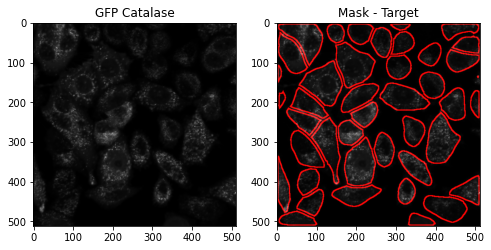

In [2]:
# {code-cell} ipython3
# :tags: [hide-input]
maskContour = afd.Compsite_display(input_image = img[0,:,:], mask_roi = mask, channel= 0).draw_ROI_contour()
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) 
ax[0].imshow(img[0,:,:], cmap=plt.cm.gray) 
ax[0].title.set_text('GFP Catalase') 
ax[1].imshow(maskContour, cmap=plt.cm.rainbow) 
ax[1].title.set_text('Mask - Target') 